<a href="https://colab.research.google.com/github/Guo0911/generative_ai/blob/main/%5BGenerative_AI%5D_Homework_08a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

剛好我需要回覆一封電子郵件，因此我就試著讓 AI 幫我修改我的回覆

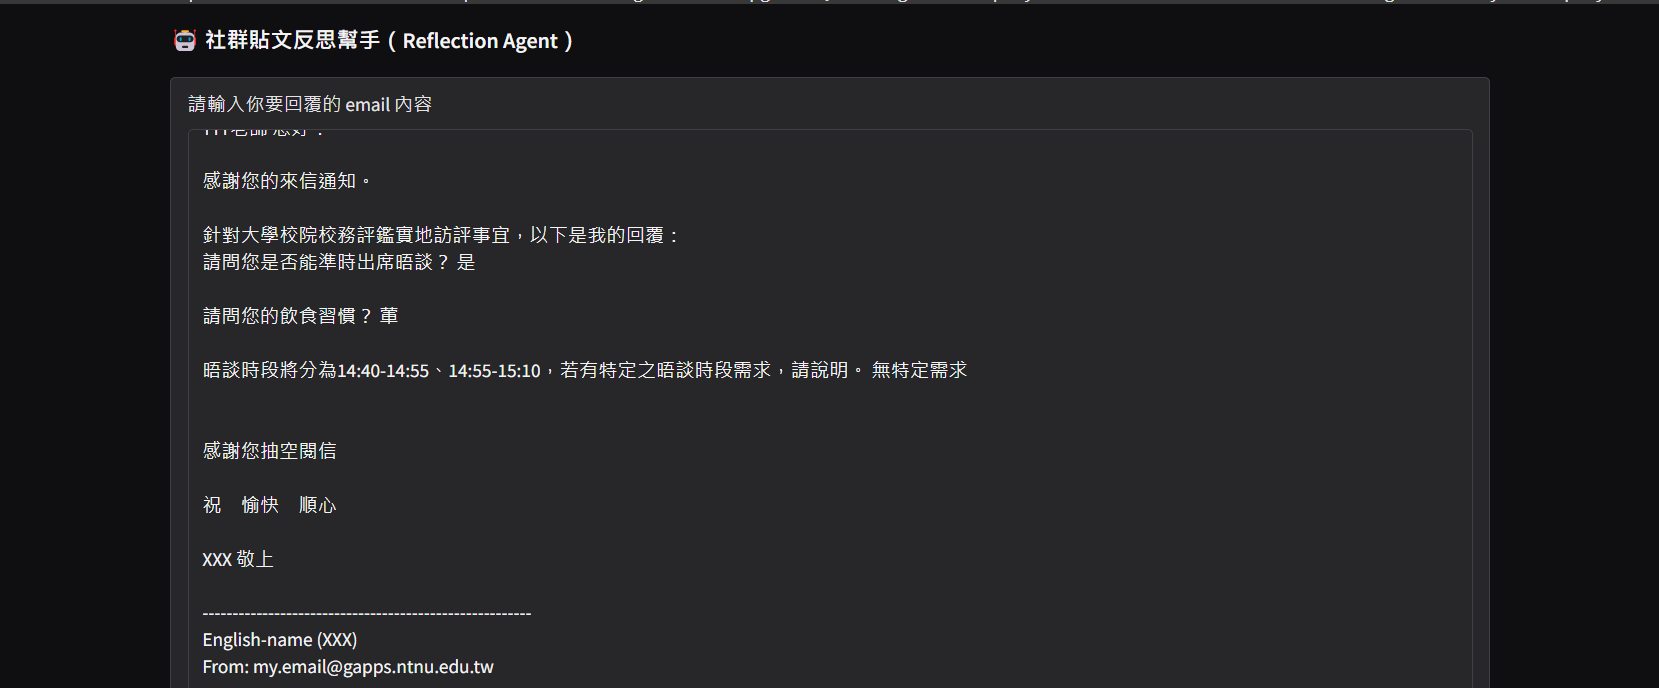

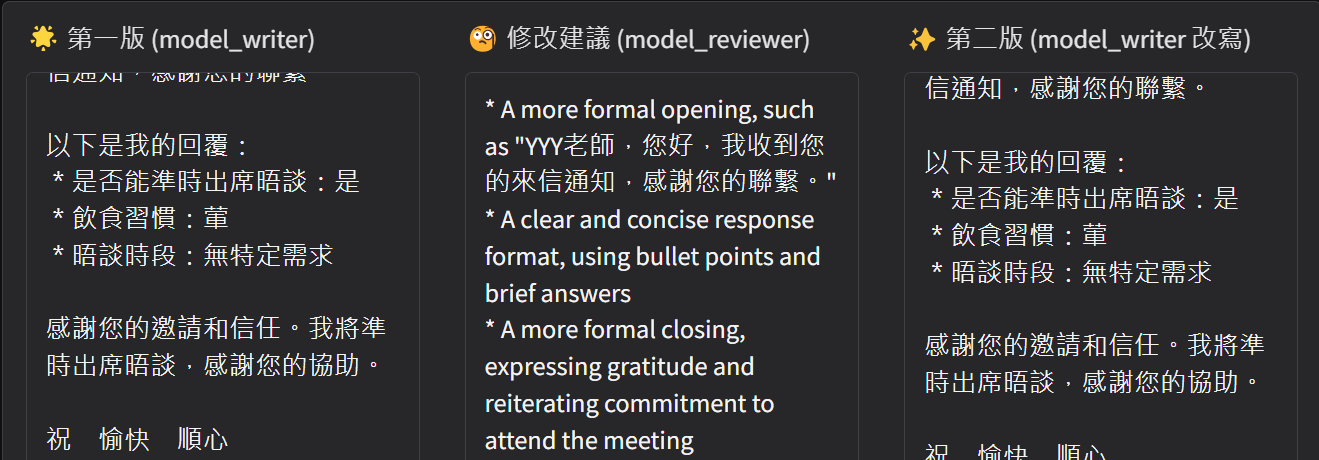

### 0. Reflection 的任務設計

#### 🌟 任務說明：社群媒體發文優化小幫手

**🎯 流程說明：**
1. 使用者輸入今天想分享的內容
2. `model_writer` 生成第一版社群發文（風格活潑、有趣、使用 emoji、第一人稱）
3. `model_reviewer` 檢查內容是否夠生活化、通順、有趣，並提供具體修改建議
4. `model_writer` 根據建議產出第二版
5. Gradio 呈現：三個欄位：第一版、建議、第二版

#### 1. 讀入你的金鑰

請依你使用的服務, 決定讀入哪個金鑰

In [1]:
import os
from google.colab import userdata

In [2]:
api_key = userdata.get('Groq')
os.environ['GROQ_API_KEY']=api_key
provider = "groq"
model = "llama3-70b-8192"

In [3]:
!pip install aisuite[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.9/863.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: httpx
    Found existing installation: httpx 0.28.1
    Uninstalling httpx-0.28.1:
      Successfully uninstalled httpx-0.28.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 1.12.1 requires httpx<1.0.0,>=0.28.1, but you have httpx 0.27.2 which is incompatible.


### 2. 基本的設定

In [4]:
import aisuite as ai

In [5]:
provider_writer = "groq"
model_writer="llama3-70b-8192"

provider_reviewer = "groq"
model_reviewer = "llama3-70b-8192"

標準回應函式

In [6]:
def reply(system="請用台灣習慣的中文回覆。",
          prompt="hi",
          provider="groq",
          model="llama3-70b-8192"
          ):

    client = ai.Client()

    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": prompt}
    ]


    response = client.chat.completions.create(model=f"{provider}:{model}", messages=messages)

    return response.choices[0].message.content

####  3. 設定「作者」和「審查員」

In [7]:
system_writer = "你是一位專業的電子郵件溝通顧問，擅長幫助撰寫各種職場情境下的電子郵件。你能根據不同的收件對象、目的和語境，提供清晰、得體且有效的電子郵件內容。你特別注重禮貌性、專業度和溝通效率，能夠協助使用者傳達複雜信息、處理敏感話題，或建立良好的工作關係。請用台灣習慣的中文回應，注重簡潔明確的表達，並提供符合台灣職場文化的適當用語和格式。"
system_reviewer = "你是一位資深的電子郵件溝通審核專家，擅長分析和優化職場電子郵件。你會從結構、語氣、清晰度、專業度和效果等多個維度評估電子郵件內容，並提供具體的改進建議。你特別關注是否有模糊表達、過於冗長的段落、不適當的用語，或可能造成誤解的內容。請用台灣習慣的中文回應，提供有建設性的反饋，包括具體的修改建議和優化方向，確保電子郵件能夠達到預期的溝通效果。"

In [8]:
def reflect_post(prompt):
    # Step 1: Writer 初稿
    first_version = reply(system_writer, prompt,
                          provider=provider_writer,
                          model=model_writer
                          )

    # Step 2: Reviewer 給建議
    suggestion = reply(system_reviewer, first_version,
                       provider=provider_reviewer,
                       model=model_reviewer
                       )

    # Step 3: Writer 再寫一次（根據建議）
    second_prompt = f"這是我剛才撰寫的電子郵件草稿：\n{first_version}\n\n這是溝通專家的評估與建議：\n{suggestion}\n\n請根據這些專業建議，幫我優化這封郵件，使內容更加清晰、專業且得體。請保留原意的同時，改善表達方式、結構和語氣，以確保能有效達成溝通目的。請用台灣習慣的中文撰寫，並且直接提供修改後的完整郵件內容即可。"
    second_version = reply(system_writer, second_prompt,
                           provider=provider_writer,
                           model=model_reviewer
                           )

    return first_version, suggestion, second_version

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [9]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00


In [10]:
import gradio as gr

In [11]:
with gr.Blocks() as demo:
    gr.Markdown("### 🤖 社群貼文反思幫手（Reflection Agent）")
    user_input = gr.Textbox(label="請輸入你要回覆的 email 內容")
    btn = gr.Button("開始修改回覆的 email 內容")

    with gr.Row():
        out1 = gr.Textbox(label="🌟 第一版 (model_writer)")
        out2 = gr.Textbox(label="🧐 修改建議 (model_reviewer)")
        out3 = gr.Textbox(label="✨ 第二版 (model_writer 改寫)")

    btn.click(reflect_post, inputs=[user_input], outputs=[out1, out2, out3])

In [ ]:
demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://bf95e2bfcab68ce419.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
